# Emory_code

#### Generating some plots and charts for presentation

# Imports

In [125]:
from config import IMAGE_DIR
from nilearn import datasets, plotting
import numpy as np 
import os
import matplotlib.pyplot as plt 
import nibabel as nib

%matplotlib inline

# Functions

## 1. `plot_random_matrix()`

#### Plot random N x N matrix

In [22]:
def plot_random_matrix(min, max, size: tuple, cmap: [None or str]):
    """Plotting random matrices
    
    Parameters
    ----------
    min: int

    max: int
    
    size: tuple
    
    cmap: [None or str]

    Return
    -------
    X: ndarray
    """

    if cmap is None:
        cmap = 'viridis'

    X = np.random.uniform(low=min, high=max, size=size)
    plt.imshow(X, cmap=cmap)

    return X

## 2. `plot_hippo()`

#### Plot "medial wall"

In [123]:
def plot_mwall(cmap):

    # get atlas
    atlas = datasets.fetch_atlas_surf_destrieux()

    # hemisphere
    hemi = atlas['map_left']

    # mask
    mask = np.zeros_like(hemi, dtype=float)
    roi_indices = np.where((hemi == 42) | (hemi == 23))
    mask[roi_indices] = np.random.uniform(-10, 10, size=len(roi_indices[0]))

    #fsaverage
    fsaverage = datasets.fetch_surf_fsaverage()


    p = plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=mask,
                                hemi='left', view='medial',
                                bg_map=fsaverage['sulc_left'], bg_on_data=True,
                                darkness=.5, cmap=cmap)

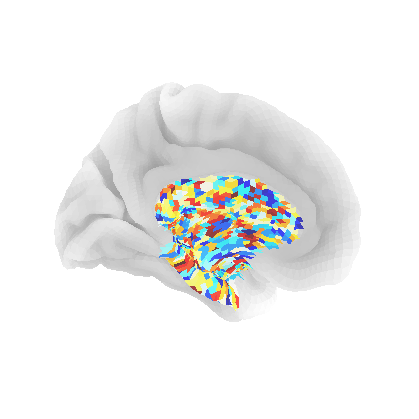

In [124]:
plot_mwall(cmap='cold_white_hot_r')

In [174]:
atlas = datasets.fetch_atlas_juelich("maxprob-thr0-1mm")
atlas_labels = atlas.labels
atlas_data = nib.load(atlas.filename).get_fdata()

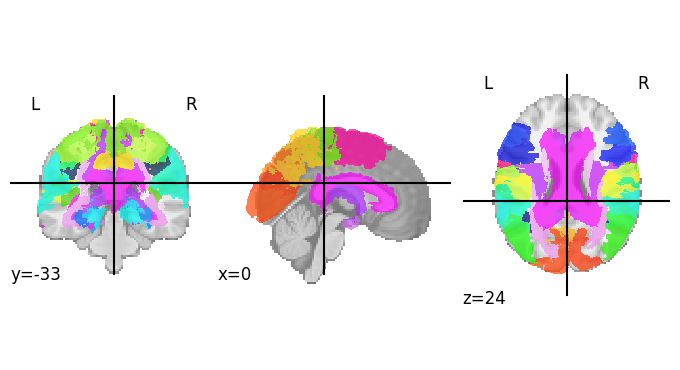

In [176]:
plotting.plot_roi(atlas.filename)